In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\acer\Desktop\Python\Data Science\Features Engineering\data\loan.csv')
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\acer\AppData\Local\Temp\ipykernel_13076\621488230.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


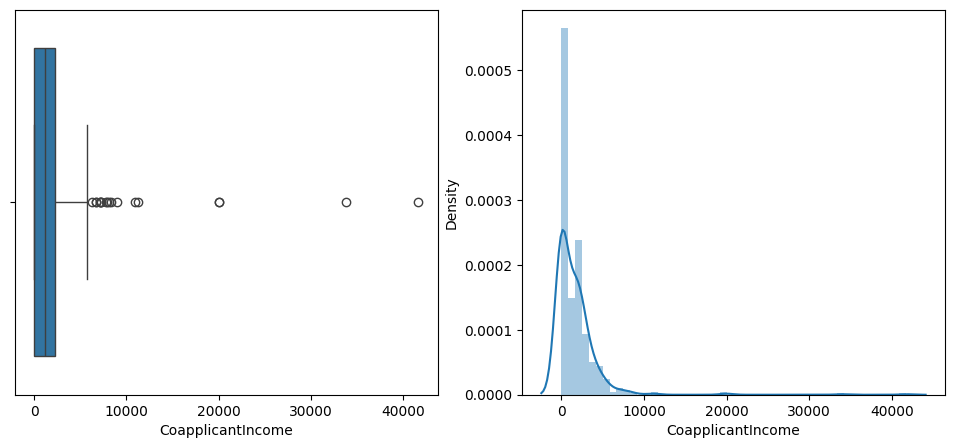

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='CoapplicantIncome',data=data)

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'])
plt.show()

In [8]:
data.shape

(614, 13)

# 1. Removing Outlier by usising Outlier

#### When data Distrubation is non-norma or smaller dataset use Z-Score for removing outlier¶

In [9]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q3 = data['CoapplicantIncome'].quantile(0.75)
IQR = q3-q1

In [10]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range,max_range

(-3445.875, 5743.125)

In [11]:
new_dataset = data[data['CoapplicantIncome'] <= max_range]

In [12]:
new_dataset.shape

(596, 13)

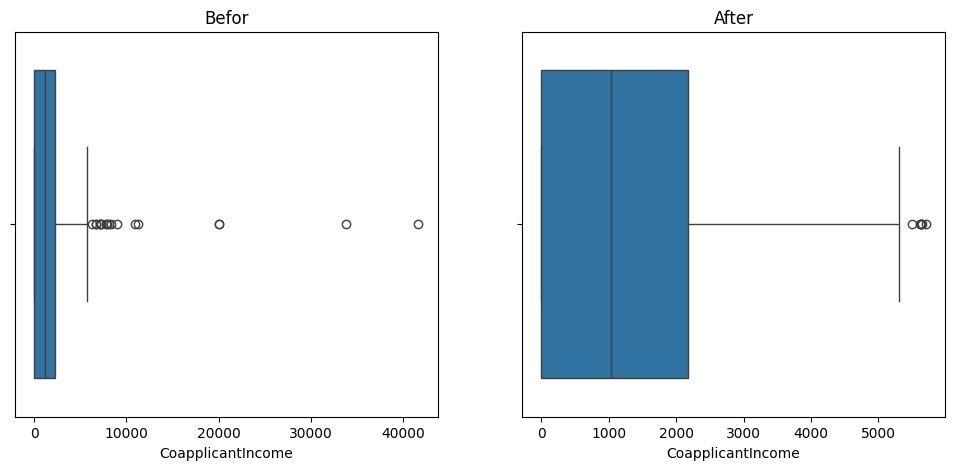

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='CoapplicantIncome',data=data)
plt.title('Befor')

plt.subplot(1,2,2)
sns.boxplot(x='CoapplicantIncome',data=new_dataset)
plt.title('After')
plt.show()

# 2. Removing Outliner Using Z-Score 

### When data Distrubation is norma; or large dataset use Z-Score for removing outlier

In [16]:
from scipy.stats import zscore

In [17]:
data_1 = pd.read_csv(r'C:\Users\acer\Desktop\Python\Data Science\Features Engineering\data\loan.csv')
data_1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


C:\Users\acer\AppData\Local\Temp\ipykernel_13076\1457649239.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['CoapplicantIncome'])


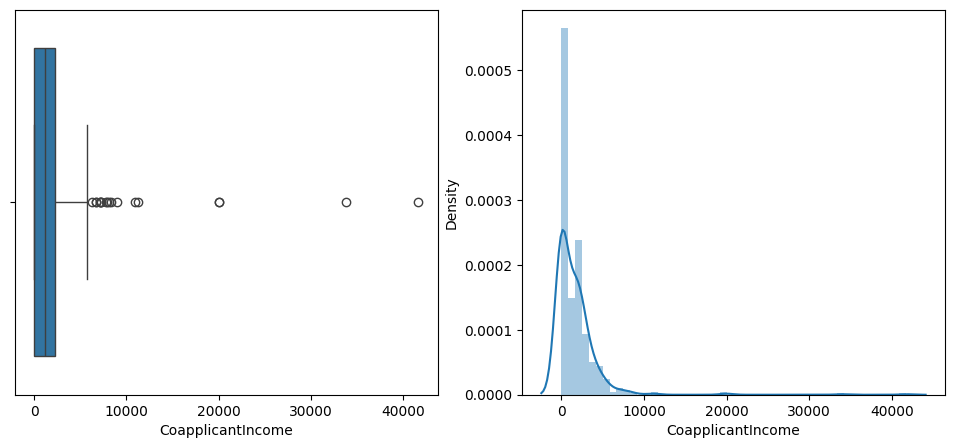

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='CoapplicantIncome',data=data_1)

plt.subplot(1,2,2)
sns.distplot(data_1['CoapplicantIncome'])
plt.show()

In [20]:
threshold = 3

In [21]:
data_1['z_score'] = zscore(data_1['CoapplicantIncome'] > threshold)

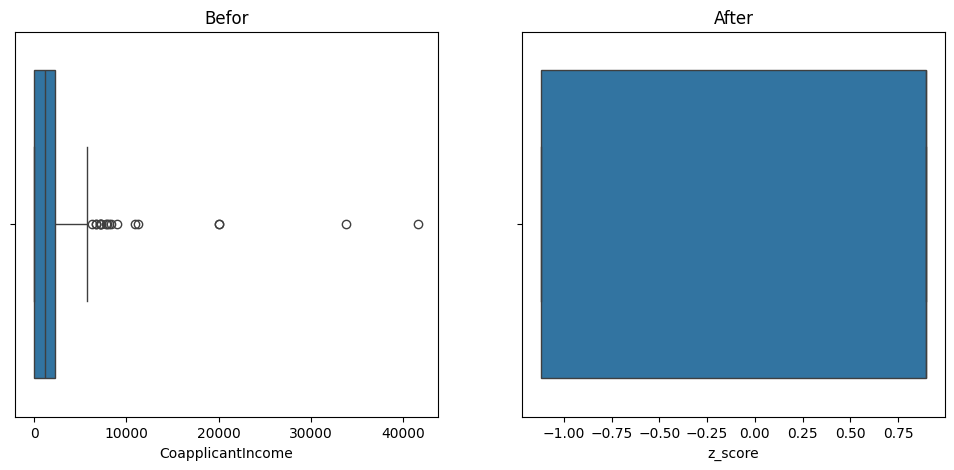

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='CoapplicantIncome',data=data_1)
plt.title('Befor')

plt.subplot(1,2,2)
sns.boxplot(x='z_score',data=data_1)
plt.title('After')
plt.show()

# 3. Removing Outlier by usingPercentile Method

#### When data Distrubation is non-norma or smaller dataset use Z-Score for removing outlier¶

In [23]:
data_2 = pd.read_csv(r'C:\Users\acer\Desktop\Python\CSV FILES\loan.csv')
data_2.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [31]:
lower_bond = data_2['CoapplicantIncome'].quantile(0.05)
upper_bond = data_2['CoapplicantIncome'].quantile(0.95)

In [34]:
data_2['Coapplicantincome_Per'] = ((data_2['CoapplicantIncome'] < lower_bond) | (data_2['CoapplicantIncome'] > upper_bond))

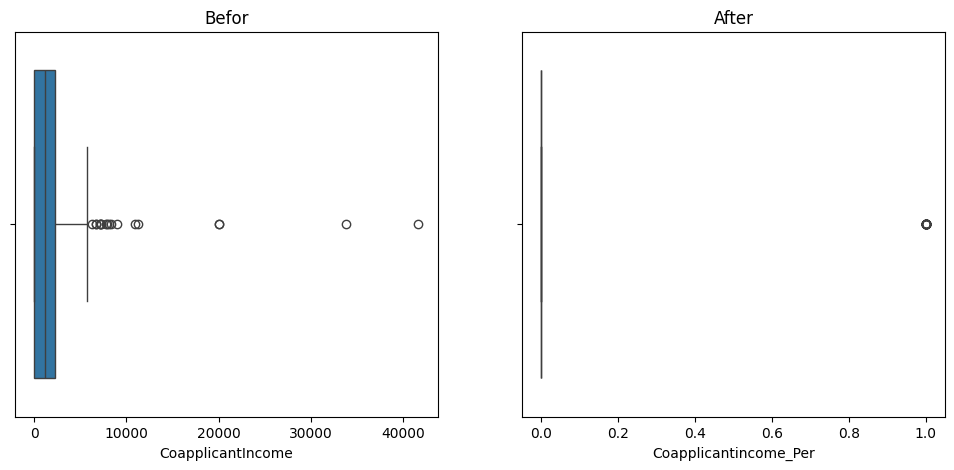

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='CoapplicantIncome',data=data_1)
plt.title('Befor')

plt.subplot(1,2,2)
sns.boxplot(x='Coapplicantincome_Per',data=data_2)
plt.title('After')
plt.show()

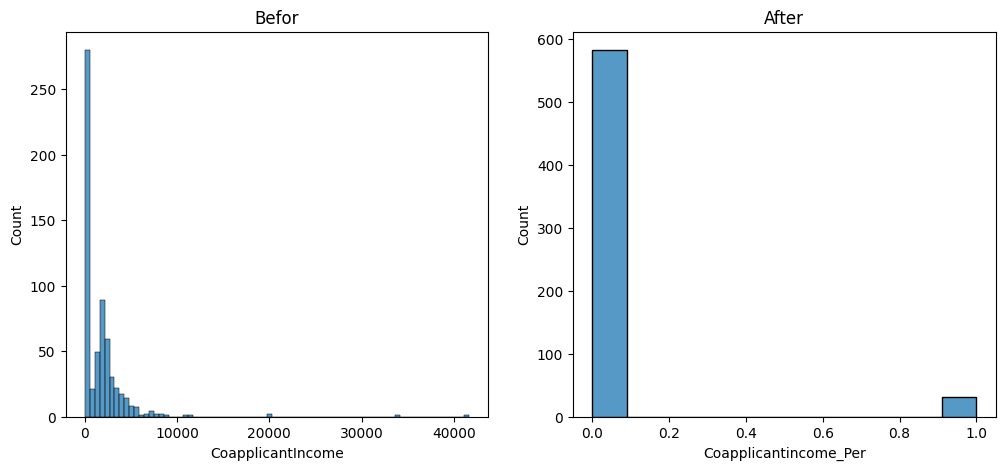

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x='CoapplicantIncome',data=data_1)
plt.title('Befor')

plt.subplot(1,2,2)
sns.histplot(x='Coapplicantincome_Per',data=data_2)
plt.title('After')
plt.show()

# 4. Removing Outlier by using Winsorization

### Winsorization is modify the outiler

In [37]:
data_3 = pd.read_csv(r'C:\Users\acer\Desktop\Python\CSV FILES\loan.csv')
data_3.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [39]:
# Calculate the 5th and 95th percentiles
lower_bound = data_3['CoapplicantIncome'].quantile(0.05)
upper_bound = data_3['CoapplicantIncome'].quantile(0.95)

# Apply Winsorization
data_3['CoapplicantIncome_Winsorized'] = data_3['CoapplicantIncome'].clip(lower=lower_bound, upper=upper_bound)

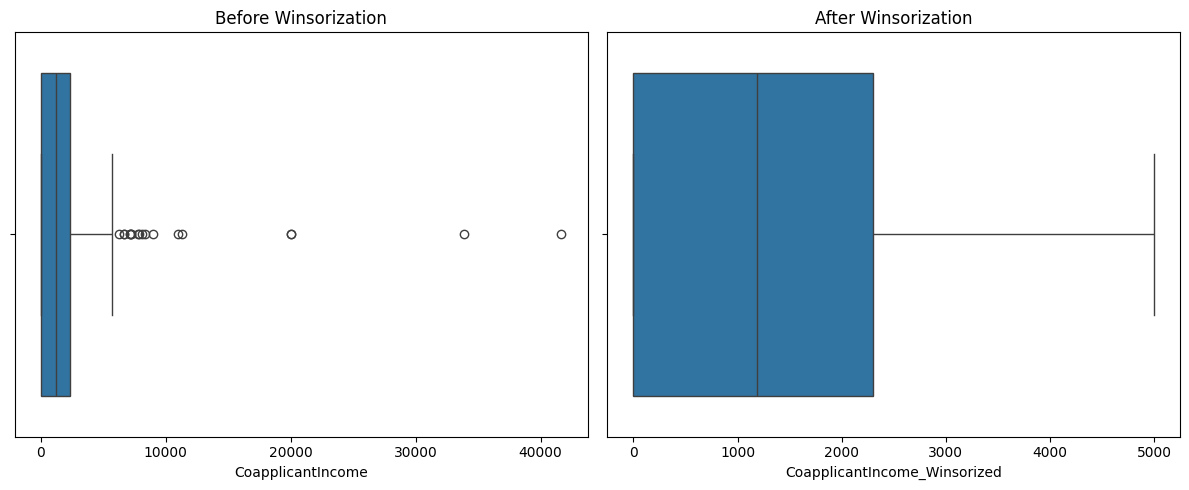

In [42]:
# Create the plots
plt.figure(figsize=(12, 5))

# Plot before Winsorization
plt.subplot(1, 2, 1)
sns.boxplot(x='CoapplicantIncome', data=data_3)
plt.title('Before Winsorization')

# Plot after Winsorization
plt.subplot(1, 2, 2)
sns.boxplot(x='CoapplicantIncome_Winsorized', data=data_3)
plt.title('After Winsorization')

# Show the plots
plt.tight_layout()  # Adjusts subplot params so that subplots fit into figure area.
plt.show()